In [28]:
# ライブラリをインポート

# データ操作と数値計算のため
import pandas as pd
import numpy as np

# データ可視化のため
import matplotlib.pyplot as plt
import seaborn as sns

# 統計モデリングと計量経済分析のため
import statsmodels.api as sm
from statsmodels.genmod.families import Poisson, Gaussian
from pymer4.models import Lmer

# for ignore warning
import warnings
warnings.filterwarnings('ignore')

In [22]:
filepath = '../data/df.csv'
df = pd.read_csv(filepath, encoding='shift-jis').replace('-', np.nan)

df['population'] = pd.to_numeric(df['population'], errors='coerce')

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1382 entries, 0 to 3097
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   island                            1382 non-null   object 
 1   year                              1382 non-null   int64  
 2   island_id                         1382 non-null   int64  
 3   region                            1382 non-null   object 
 4   town                              1382 non-null   object 
 5   pref                              1382 non-null   object 
 6   pref_id                           1382 non-null   int64  
 7   population                        1382 non-null   float64
 8   dummy_has_bridge                  1382 non-null   int64  
 9   dummy_connect_mainland_by_bridge  1382 non-null   int64  
 10  year_bridge_opened                1382 non-null   float64
 11  dummy_after_bridge_build          1382 non-null   int64  
 12  year_connec

In [15]:
df.head()

,island,year,island_id,region,town,pref,pref_id,population,dummy_has_bridge,dummy_connect_mainland_by_bridge,year_bridge_opened,dummy_after_bridge_build,year_connect_mainland,dummy_after_connect_mainland
0,島後,2001,60,隠岐島,隠岐の島町,島根県,32,17930.0,0,0,0.0,0,0.0,0
1,島後,2002,60,隠岐島,隠岐の島町,島根県,32,17865.0,0,0,0.0,0,0.0,0
2,島後,2003,60,隠岐島,隠岐の島町,島根県,32,17704.0,0,0,0.0,0,0.0,0
3,島後,2004,60,隠岐島,隠岐の島町,島根県,32,17535.0,0,0,0.0,0,0.0,0
4,島後,2005,60,隠岐島,隠岐の島町,島根県,32,17259.0,0,0,0.0,0,0.0,0


In [17]:
df.describe()

,year,island_id,pref_id,population,dummy_has_bridge,dummy_connect_mainland_by_bridge,year_bridge_opened,dummy_after_bridge_build,year_connect_mainland,dummy_after_connect_mainland
count,1386.000000,1386.000000,1386.000000,1382.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000
mean,2005.849928,132.844156,35.345599,1885.819826,0.171717,0.143579,342.113276,0.105339,286.015152,0.076479
std,13.026792,46.838492,1.965305,5535.058525,0.377271,0.350789,751.656633,0.307101,698.805123,0.265859
min,1920.000000,60.000000,32.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,85.000000,34.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2006.000000,142.000000,35.000000,168.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2013.000000,172.000000,37.000000,690.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020.000000,223.000000,39.000000,41960.000000,1.000000,1.000000,2022.000000,1.000000,2015.000000,1.000000


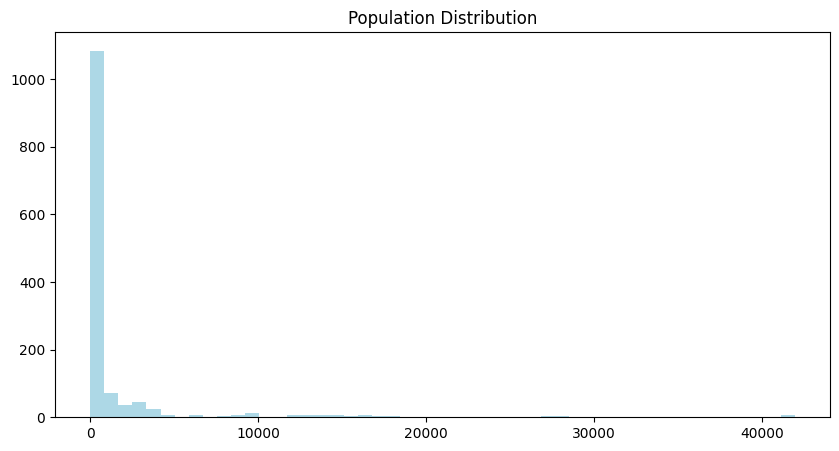

In [42]:
plt.figure(figsize=(10, 5))
plt.hist(df['population'], bins=50, color='lightblue')
plt.title('Population Distribution')
plt.show()

In [24]:
endog = df['population']
exog = sm.add_constant(df[['dummy_after_bridge_build']])
family = sm.families.Poisson()

model = sm.GLM(endog, exog, family)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             population   No. Observations:                 1382
Model:                            GLM   Df Residuals:                     1380
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.3577e+06
Date:                Sat, 28 Sep 2024   Deviance:                   8.7055e+06
Time:                        22:34:20   Pearson chi2:                 2.24e+07
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        7.4036      0.001   1.05e+04      0.000       7.402       7.405
dummy_after_bridge_build     0.8782      0.001    588.548      0.000       0.875       0.881
============================================================================================
"""

In [38]:
formula = 'population ~ dummy_after_bridge_build + (1|island_id) + (1|year)'

model = Lmer(formula, df, family='poisson')

results = model.fit()

print(results)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: population~dummy_after_bridge_build+(1|island_id)+(1|year)

Family: poisson	 Inference: parametric

Number of observations: 1382	 Groups: {'island_id': 118.0, 'year': 37.0}

Log-likelihood: -15383.713 	 AIC: 30775.425

Random effects:

                  Name    Var    Std
island_id  (Intercept)  3.613  1.901
year       (Intercept)  0.046  0.215

No random effect correlations specified

Fixed effects:

                          Estimate  2.5_ci  97.5_ci     SE  Z-stat  P-val  Sig
(Intercept)                  5.348   4.998    5.697  0.179  29.948    0.0  ***
dummy_after_bridge_build     0.072   0.064    0.080  0.004  17.886    0.0  ***


In [40]:
residuals = results.resid

AttributeError: 'DataFrame' object has no attribute 'resid'